In [64]:
#combine 2 csv files drop column id 'column' then save into onw csv
import pandas as pd
import numpy as np


#read csv file
df1 = pd.read_csv('Umami_testing_dataset.csv')
df2 = pd.read_csv('Umami_training_dataset.csv')

#drop column
df1.drop('Column1', axis=1, inplace=True)
df1.drop('Parent_SMILES', axis=1, inplace=True)
df2.drop('Parent_SMILES', axis=1, inplace=True)
df2.drop('Column1', axis=1, inplace=True)


#combine 2 csv files
df = pd.concat([df1, df2],ignore_index=True)

#iterate over TASTE collumn and change values

df['TASTE'] = df['TASTE'].apply(lambda x: 1 if str(x).startswith("u") else 0)

#save to csv
df.to_csv('file.csv', index=False)





In [65]:
#use rdkit to convert smiles to mol
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools

#read csv file
df = pd.read_csv('file.csv')
df['mol']=df['Std_SMILES'].apply(lambda x: Chem.MolFromSmiles(x))


In [66]:
# X=df.drop(columns='TASTE',inplace=False)
y=df['TASTE']
X=df.drop(columns='TASTE',inplace=False)
y
X

,SEQUENCE,Std_SMILES,mol
0,CALTP,CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)[C@@H](N)CS)C(...,<rdkit.Chem.rdchem.Mol object at 0x2a3182180>
1,AEA,C[C@H](N)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](C)...,<rdkit.Chem.rdchem.Mol object at 0x2a3182110>
2,VG,CC(C)[C@H](N)C(=O)NCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2a31820a0>
3,VF,CC(C)[C@H](N)C(=O)N[C@@H](Cc1ccccc1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2a3182030>
4,AAPY,C[C@H](N)C(=O)N[C@@H](C)C(=O)N1CCC[C@H]1C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x2a3181fc0>
...,...,...,...
437,GYY,NCC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1cc...,<rdkit.Chem.rdchem.Mol object at 0x2a0044cf0>
438,RPFFRPFF,N=C(N)NCCC[C@H](N)C(=O)N1CCC[C@H]1C(=O)N[C@@H]...,<rdkit.Chem.rdchem.Mol object at 0x2a0044d60>
439,IE,CC[C@H](C)[C@H](N)C(=O)N[C@@H](CCC(=O)O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2a0044dd0>
440,IS,CC[C@H](C)[C@H](N)C(=O)N[C@@H](CO)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2a0044e40>


In [67]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('model_300dim.pkl')

      



X.shape

(442, 3)

In [68]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
df['sentence'] = df.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)



In [69]:
df['mol2vec'] = [DfVec(x) for x in sentences2vec(df['sentence'], model)]

In [70]:
df
X = np.array([x.vec for x in df['mol2vec']])

In [71]:
X = np.array([x.vec for x in df['mol2vec']])

In [72]:
X.shape


(442, 300)

In [73]:
#save the data as numpy array
np.save('Xmol2vec.npy', X)
np.save('ymol2vec.npy', y)


In [74]:
print(X[0])

[ 1.67110220e-01 -2.05820322e+00 -4.71039248e+00 -2.89131856e+00
  6.50057602e+00 -6.29690075e+00 -1.49995871e+01 -4.90180492e+00
  1.47420168e+01  1.59416485e+00  6.27516806e-01  5.90372705e+00
  3.62904930e+00  5.18021774e+00 -1.29874916e+01 -6.29498601e-01
  1.19649725e+01 -1.83549347e+01 -1.29549265e+01  1.24220295e+01
  3.99702764e+00  1.25278931e+01  2.24470196e+01  6.99144173e+00
 -4.35944605e+00  6.23554325e+00 -1.12722168e+01 -1.19258223e+01
  4.51000500e+00 -9.77745724e+00  5.33896971e+00 -7.13298893e+00
 -1.11209545e+01  3.56816739e-01 -1.41137636e+00  4.37806034e+00
 -1.92036343e+00  1.95603371e+00  7.47544003e+00  1.01122713e+01
  2.17269087e+00  9.52645111e+00 -4.85903692e+00 -6.79598475e+00
 -2.96072364e+00  7.00032854e+00  5.70706606e+00  2.29232426e+01
 -1.00890436e+01  1.72249973e+00  2.50891066e+00 -1.17815409e+01
  2.93588567e+00 -1.08822412e+01 -1.42535353e+01 -2.25757961e+01
 -9.03721619e+00  8.92336178e+00  3.70611024e+00  5.24022818e+00
  3.09952664e+00 -5.06963

In [75]:
y.shape

(442,)

In [102]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]


print('accuracy: ')
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_proba))
#f1 score
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))


accuracy: 
0.8222222222222222
0.8
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       1.00      0.60      0.75        20

    accuracy                           0.82        45
   macro avg       0.88      0.80      0.81        45
weighted avg       0.87      0.82      0.81        45

0.89
0.7499999999999999
0.6741998624632421


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[36  0]
 [ 2  7]]


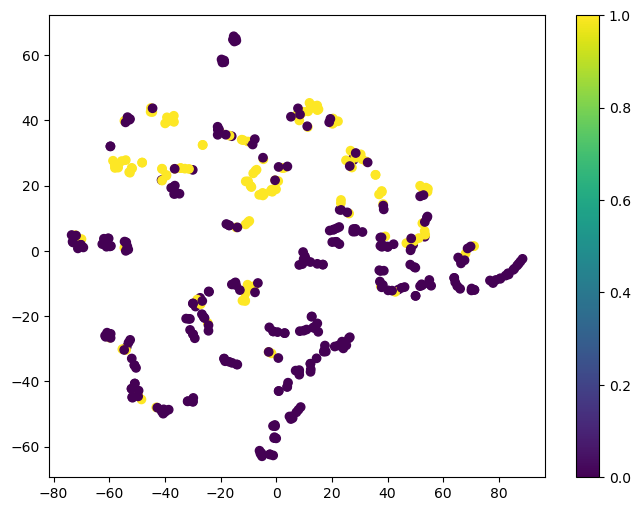

In [79]:
#tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0,perplexity=5)

X_2d = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0],X_2d[:,1],c=y,cmap='viridis')
plt.colorbar()
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


0.9111111111111111
0.8611111111111112
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.78      0.78      0.78         9

    accuracy                           0.91        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.91      0.91      0.91        45



/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
#support vector classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


0.9333333333333333
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.80      0.89      0.84         9

    accuracy                           0.93        45
   macro avg       0.89      0.92      0.90        45
weighted avg       0.94      0.93      0.93        45



In [107]:
#multilayer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
#mcc
print(matthews_corrcoef(y_test, y_pred))
#cross validation
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_proba))
#cross validation
from sklearn.model_selection import cross_val_score



0.8444444444444444
0.83
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.93      0.70      0.80        20

    accuracy                           0.84        45
   macro avg       0.87      0.83      0.84        45
weighted avg       0.86      0.84      0.84        45

0.6957010852370434
0.8
0.928


In [83]:
#apply 10 fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score


cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
y_pred = cross_val_predict(rf, X_train, y_train, cv=cv)
print('Accuracy:', np.mean(scores))
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7986538461538462


ValueError: Found input variables with inconsistent numbers of samples: [45, 397]

NameError: name 'X_train' is not defined